In [1]:
PATH='/home/kirana/Documents/phd/experiment1_new/DNNREC_BookCrossing'
DATAPATH='/home/kirana/Documents/final_dissertation_final/experiments/datasets/bookcrossing'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import pickle
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import pickle
import sklearn
from sklearn import metrics

In [3]:
torch.__version__

'1.2.0'

In [4]:
[df,dftrain,dfvalid,idx_to_user,idx_to_item,item_to_idx,user_to_idx,results_concat]=\
    pickle.load(open(f'{DATAPATH}/df_side_cold_runother_cf.pkl','rb'))

In [5]:
dftrain.columns

Index(['level_0', 'index', 'userId', 'itemId', 'rating',
       'num_ratings_per_user_gt_20', 'num_ratings_per_item_gt_200',
       'flag_clean_considered', 'Location', 'Age', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'random_dstype', 'user_idx',
       'item_idx', 'flag_train'],
      dtype='object')

In [6]:
dftrain.head().T

,0,1,2,3,4
level_0,0,1,2,3,4
index,275615,170503,70704,647,413358
userId,170762,100906,38281,277371,262541
itemId,0425175405,0151112495,8484504859,0007137699,0312963920
rating,9,9,5,6,7
num_ratings_per_user_gt_20,True,True,True,False,True
num_ratings_per_item_gt_200,True,False,False,False,False
flag_clean_considered,True,False,False,False,False
Location,"lansing, michigan, usa","seattle, washington, usa","barcelona, catalunya, spain","sydney, new south wales, australia","pierrefonds, quebec, canada"
Age,60,34,33,57,NaN


In [7]:
dftrain.columns

Index(['level_0', 'index', 'userId', 'itemId', 'rating',
       'num_ratings_per_user_gt_20', 'num_ratings_per_item_gt_200',
       'flag_clean_considered', 'Location', 'Age', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'random_dstype', 'user_idx',
       'item_idx', 'flag_train'],
      dtype='object')

In [8]:
dftrain.rename({'Book-Title':'BookTitle','Book-Author':'BookAuthor','Year-Of-Publication':'YearOfPublication'},axis=1,inplace=True)

In [9]:
dfvalid.rename({'Book-Title':'BookTitle','Book-Author':'BookAuthor','Year-Of-Publication':'YearOfPublication'},axis=1,inplace=True)

In [10]:
dftrain.isnull().sum()

level_0                             0
index                               0
userId                              0
itemId                              0
rating                              0
num_ratings_per_user_gt_20          0
num_ratings_per_item_gt_200         0
flag_clean_considered               0
Location                            0
Age                            115646
BookTitle                       44936
BookAuthor                      44937
YearOfPublication               44936
Publisher                       44938
random_dstype                       0
user_idx                            0
item_idx                            0
flag_train                          0
dtype: int64

In [11]:
dftrain.isnull().sum()/dftrain.shape[0]

level_0                        0.000000
index                          0.000000
userId                         0.000000
itemId                         0.000000
rating                         0.000000
num_ratings_per_user_gt_20     0.000000
num_ratings_per_item_gt_200    0.000000
flag_clean_considered          0.000000
Location                       0.000000
Age                            0.295771
BookTitle                      0.114926
BookAuthor                     0.114929
YearOfPublication              0.114926
Publisher                      0.114931
random_dstype                  0.000000
user_idx                       0.000000
item_idx                       0.000000
flag_train                     0.000000
dtype: float64

In [12]:
for myNm in ['Age','BookTitle','BookAuthor','YearOfPublication','Publisher']:
    dftrain[myNm+'_NA']=dftrain[myNm].isnull().astype(int)
    dfvalid[myNm+'_NA']=dfvalid[myNm].isnull().astype(int)

In [13]:
for myNm in ['Age','BookTitle','BookAuthor','YearOfPublication','Publisher']:
    dftrain[myNm].fillna('-1',inplace=True)
    dfvalid[myNm].fillna('-1',inplace=True)

In [14]:
#Age, Location,  Book-Author, Year-Of-Publication, Publisher

In [15]:
df=pd.concat([dftrain,dfvalid],axis=0)

/home/kirana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [16]:
df.shape,df.head()

((433671, 35),   Age  Age_NA                 BookAuthor  BookAuthor_NA  \
 0  60       0  Patricia Daniels Cornwell              0   
 1  34       0              James Thurber              0   
 2  33       0         Mary Higgins Clark              0   
 3  57       0                         -1              1   
 4  -1       1                Dan Mahoney              0   
 
                                            BookTitle  BookTitle_NA  \
 0                                       Black Notice             0   
 1  The beast in me and other animals;: A collecti...             0   
 2                                  Un Extrano Acecha             0   
 3                                                 -1             1   
 4                                               Hyde             0   
 
                              Location                  Publisher  \
 0              lansing, michigan, usa   Berkley Publishing Group   
 1            seattle, washington, usa  Harcourt Brace Jov

In [17]:
Publisher_to_idx={j:i+1 for i,j in enumerate(df['Publisher'].unique())}
idx_to_Publisher={i+1:j for i,j in enumerate(df['Publisher'].unique())}
YearOfPublication_to_idx={j:i+1 for i,j in enumerate(df['YearOfPublication'].unique())}
idx_to_YearOfPublication={i+1:j for i,j in enumerate(df['YearOfPublication'].unique())}
BookAuthor_to_idx={j:i+1 for i,j in enumerate(df['BookAuthor'].unique())}
idx_to_BookAuthor={i+1:j for i,j in enumerate(df['BookAuthor'].unique())}
Location_to_idx={j:i+1 for i,j in enumerate(df['Location'].unique())}
idx_to_Location={i+1:j for i,j in enumerate(df['Location'].unique())}
Age_to_idx={j:i+1 for i,j in enumerate(df['Age'].unique())}
idx_to_Age={i+1:j for i,j in enumerate(df['Age'].unique())}

In [18]:
dftrain['Publisher_idx']=[Publisher_to_idx.get(i) for i in dftrain['Publisher']]
dfvalid['Publisher_idx']=[Publisher_to_idx.get(i) for i in dfvalid['Publisher']]
dftrain['YearOfPublication_idx']=[YearOfPublication_to_idx.get(i) for i in dftrain['YearOfPublication']]
dfvalid['YearOfPublication_idx']=[YearOfPublication_to_idx.get(i) for i in dfvalid['YearOfPublication']]

In [19]:

dftrain['BookAuthor_idx']=[BookAuthor_to_idx.get(i) for i in dftrain['BookAuthor']]
dfvalid['BookAuthor_idx']=[BookAuthor_to_idx.get(i) for i in dfvalid['BookAuthor']]

In [20]:

dftrain['Location_idx']=[Location_to_idx.get(i) for i in dftrain['Location']]
dfvalid['Location_idx']=[Location_to_idx.get(i) for i in dfvalid['Location']]

In [21]:

dftrain['Age_idx']=[Age_to_idx.get(i) for i in dftrain['Age']]
dfvalid['Age_idx']=[Age_to_idx.get(i) for i in dfvalid['Age']]

In [22]:
catCols=['Publisher_idx','YearOfPublication_idx','BookAuthor_idx','Location_idx','Age_idx']

In [23]:
catCols=catCols+[x[:-4]+'_NA' for x in catCols]

In [24]:
denseCols=['Age']

In [25]:
catCols

['Publisher_idx',
 'YearOfPublication_idx',
 'BookAuthor_idx',
 'Location_idx',
 'Age_idx',
 'Publisher_NA',
 'YearOfPublication_NA',
 'BookAuthor_NA',
 'Location_NA',
 'Age_NA']

In [26]:
catCols.remove('Location_NA')

In [27]:
dftrain.columns

Index(['level_0', 'index', 'userId', 'itemId', 'rating',
       'num_ratings_per_user_gt_20', 'num_ratings_per_item_gt_200',
       'flag_clean_considered', 'Location', 'Age', 'BookTitle', 'BookAuthor',
       'YearOfPublication', 'Publisher', 'random_dstype', 'user_idx',
       'item_idx', 'flag_train', 'Age_NA', 'BookTitle_NA', 'BookAuthor_NA',
       'YearOfPublication_NA', 'Publisher_NA', 'Publisher_idx',
       'YearOfPublication_idx', 'BookAuthor_idx', 'Location_idx', 'Age_idx'],
      dtype='object')

In [28]:
dftrain[catCols].head()

,Publisher_idx,YearOfPublication_idx,BookAuthor_idx,Location_idx,Age_idx,Publisher_NA,YearOfPublication_NA,BookAuthor_NA,Age_NA
0,1,1,1,1,1,0,0,0,0
1,2,2,2,2,2,0,0,0,0
2,3,3,3,3,3,0,0,0,0
3,4,4,4,4,4,1,1,1,0
4,5,5,5,5,5,0,0,0,1


In [29]:
dftrain[catCols].max()

Publisher_idx            11033
YearOfPublication_idx      180
BookAuthor_idx           58538
Location_idx             20401
Age_idx                    135
Publisher_NA                 1
YearOfPublication_NA         1
BookAuthor_NA                1
Age_NA                       1
dtype: int64

### Dataset and DataLoader

In [30]:
class cfdata (torch.utils.data.dataset.Dataset):
    def __init__(self,dfX,dfY,denseCols,catCols):
        self.dfX,self.dfY=dfX,dfY
        self.denseCols=denseCols
        self.catCols=catCols
        
    def __len__ (self):
        return self.dfX.shape[0]
    
    def __getitem__ (self, idx):
        return torch.FloatTensor(self.dfX.iloc[idx].values),torch.FloatTensor([self.dfY.values[idx]])

In [31]:
dstrain=cfdata(dftrain[['user_idx','item_idx']+catCols],dftrain['rating'],denseCols,catCols)
dsvalid=cfdata(dfvalid[['user_idx','item_idx']+catCols],dfvalid['rating'],denseCols,catCols)

In [32]:
dftrain.shape

(390999, 28)

In [33]:
bs=64

In [34]:
dltrain=DataLoader(dstrain,bs,False)

In [35]:
dlvalid=DataLoader(dsvalid,bs,False)

In [36]:
[(col, dftrain[col].nunique()) for col in catCols]

[('Publisher_idx', 11033),
 ('YearOfPublication_idx', 180),
 ('BookAuthor_idx', 58538),
 ('Location_idx', 20401),
 ('Age_idx', 135),
 ('Publisher_NA', 2),
 ('YearOfPublication_NA', 2),
 ('BookAuthor_NA', 2),
 ('Age_NA', 2)]

In [37]:
{col: min(50,dftrain[col].nunique()//2) for col in catCols}

{'Publisher_idx': 50,
 'YearOfPublication_idx': 50,
 'BookAuthor_idx': 50,
 'Location_idx': 50,
 'Age_idx': 50,
 'Publisher_NA': 1,
 'YearOfPublication_NA': 1,
 'BookAuthor_NA': 1,
 'Age_NA': 1}

In [38]:
df=pd.concat([dftrain,dfvalid],axis=0)

/home/kirana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [39]:
emb_szs=[(df[col].nunique(),min(50,df[col].nunique()//2)) for col in catCols]

In [40]:
emb_szs

[(11576, 50),
 (182, 50),
 (62114, 50),
 (21335, 50),
 (137, 50),
 (2, 1),
 (2, 1),
 (2, 1),
 (2, 1)]

In [41]:
dftrain[catCols].head()

,Publisher_idx,YearOfPublication_idx,BookAuthor_idx,Location_idx,Age_idx,Publisher_NA,YearOfPublication_NA,BookAuthor_NA,Age_NA
0,1,1,1,1,1,0,0,0,0
1,2,2,2,2,2,0,0,0,0
2,3,3,3,3,3,0,0,0,0
3,4,4,4,4,4,1,1,1,0
4,5,5,5,5,5,0,0,0,1


## Model Architecture

In [42]:
n_users=len(user_to_idx)
n_items=len(item_to_idx)
n_emb_user=50
n_emb_item=50
min_rating=min(dftrain['rating'])
max_rating=max(dftrain['rating'])
dropout_e=0.1
    # emb,hidden2,final
hidden=[50,15,5]
dropouts=[0.25,0.25,0.1]

In [43]:
def hidden_layer(x,y,dropout,activation=nn.Sigmoid()):
    return nn.Sequential(
        nn.Linear(x, y),
        activation,
        nn.Dropout(p=dropout),
        nn.BatchNorm1d(y)
        )   

In [44]:
#[mtx_user_emb,mtx_item_emb,user_bias_emb,item_bias_emb]=pickle.load(open(f'{DATAPATH}/wts_embs','rb'))
pretrain_wts=pickle.load(open(f'{DATAPATH}/wts_embs_50','rb'))
#pretrain_wts=None

In [45]:
class cf(nn.Module):    
    def __init__(self,n_users,n_emb_user,n_emb_item,n_items,min_rating,max_rating,autoenc_cols,pretrain_wts,\
                 catCols, emb_szs,dropout_e=0.01,hidden=[15,5],dropouts=[0.2,0.2],error_type="mse",\
                lambda_l2=0.1,lambda_l1=0.1,use_l1=False,use_l2=False):
        super().__init__()
        self.n_users,self.n_emb_user,self.n_emb_item,self.n_items,self.min_rating,self.max_rating=\
                    n_users,n_emb_user,n_emb_item,n_items,min_rating,max_rating
        self.dropout_e,self.hidden,self.dropouts=dropout_e,hidden,dropouts
        self.autoenc_cols,self.len_dense_cols=autoenc_cols,len(autoenc_cols)
        self.catCols,self.emb_szs=catCols,emb_szs
        self.lambda_l2,self.lambda_l1=lambda_l2,lambda_l1
        self.use_l1,self.use_l2=use_l1,use_l2
        self.len_cat_cols=len(self.catCols)
        self.n_cat_emb=sum([x[1] for x in emb_szs])
        
        
        self.create_architecture()
        #self.init_parameters()
        
        if pretrain_wts is not None:
            self.emb_user.weight.data=torch.FloatTensor(pretrain_wts[0])
            self.emb_item.weight.data=torch.FloatTensor(pretrain_wts[1])
            self.ub.weight.data=torch.FloatTensor(pretrain_wts[2])
            self.ib.weight.data=torch.FloatTensor(pretrain_wts[3])

        if error_type!="mse":
            self.criterion=nn.L1Loss()
        else:
            self.criterion=nn.MSELoss()
        
    def create_architecture(self):
        self.emb_user=nn.Embedding(self.n_users+1,self.n_emb_user)
        self.emb_item=nn.Embedding(self.n_items+1,self.n_emb_item)
        self.ub=nn.Embedding(self.n_users+1,1)
        self.ib=nn.Embedding(self.n_items+1,1)
        self.embs_cat=nn.ModuleList([nn.Embedding(x+1,y) for x,y in self.emb_szs])
        
        self.emb_dropout=nn.Dropout(self.dropout_e)

        
        self.lin1= nn.Sequential(nn.Linear(self.n_emb_user+self.n_emb_item+self.n_cat_emb+2,self.hidden[0]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[0]) ,
                    nn.BatchNorm1d(self.hidden[0]))

        self.lin2= nn.Sequential (nn.Linear(self.hidden[0],self.hidden[1]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[1]),
                    nn.BatchNorm1d(self.hidden[1]))
        self.lin3=nn.Sequential (nn.Linear(self.hidden[1],self.hidden[2]),
                                 nn.ReLU(),
                                 nn.Dropout(p=dropouts[2]),
                                 nn.BatchNorm1d(self.hidden[2]))
        self.lin4=nn.Linear(self.hidden[2],1)
        self.sigmoid=nn.Sigmoid()
        
        
    def init_parameters(self):
        nn.init.kaiming_normal_(self.emb_user.weight.data)
        nn.init.kaiming_normal_(self.emb_item.weight.data)
        nn.init.zeros_(self.ub.weight.data)
        nn.init.zeros_(self.ib.weight.data)
        nn.init.kaiming_normal_(self.lin1[0].weight.data)
        nn.init.kaiming_normal_(self.lin2[0].weight.data)
        nn.init.kaiming_normal_(self.lin3[0].weight.data)
        nn.init.kaiming_normal_(self.lin4.weight.data)
        #nn.init.kaiming_normal_(lin)
        
        
    def add_l2_reg (self,lin_parameters):
        lin = torch.cat([x.view(-1) for x in lin_parameters])
        l2=self.lambda_l2 * torch.norm(lin,2)
        return l2
        
    def add_l1_reg (self,lin_parameters):
        lin = torch.cat([x.view(-1) for x in lin_parameters])
        l1=self.lambda_l1 * torch.norm(lin,2)
        return l1    
       
    def forward (self,Xb,Yb):
        users=Xb[:,0].long()
        items=Xb[:,1].long()
        users=self.emb_dropout(self.emb_user(users))
        items=self.emb_dropout(self.emb_item(items))
        users_bias=self.emb_dropout(self.ub(Xb[:,0].long()))
        items_bias=self.emb_dropout(self.ib(Xb[:,1].long()))
        
        embed=torch.cat([users,items],1)

        cats=Xb[:,(2):].long()
        embed_cat=[self.emb_dropout(self.embs_cat[i](cats[:,i]) ) for i in range(len(self.emb_szs))]
        embedded_cat = torch.cat([x for x in embed_cat],1)

        bias=torch.cat([users_bias,items_bias],1)
        #import pdb
        #pdb.set_trace()
        input_lin1=torch.cat([embed,embedded_cat,bias],1)
        out1=self.lin1(input_lin1)
        out2=self.lin2(out1)
        out3=self.lin3(out2)
        out4=self.lin4(out3)      
        out=self.sigmoid(out4)
        
        preds=out*(self.max_rating-self.min_rating)+self.min_rating
        #preds=preds.view(-1)
        loss=self.criterion(preds,Yb)
        if 1==0:
            if self.use_l2:
                loss = loss +  self.add_l2_reg (self.lin1.parameters()) + self.add_l2_reg (self.lin3.parameters()) + \
                    self.add_l2_reg (self.lin4.parameters()) + self.add_l2_reg (self.lin_bias.parameters()) 
            if self.use_l1:
                loss=  loss + self.add_l1_reg (self.lin_cat.parameters())

        
        
        return preds,loss

In [46]:
cfobj=cf(n_users,n_emb_user,n_emb_item,n_items,min_rating,max_rating,denseCols,pretrain_wts,catCols,emb_szs,dropout_e,hidden,dropouts,error_type="mse",lambda_l2=1e-4)

In [47]:
cfobj

cf(
  (emb_user): Embedding(77806, 50)
  (emb_item): Embedding(185974, 50)
  (ub): Embedding(77806, 1)
  (ib): Embedding(185974, 1)
  (embs_cat): ModuleList(
    (0): Embedding(11577, 50)
    (1): Embedding(183, 50)
    (2): Embedding(62115, 50)
    (3): Embedding(21336, 50)
    (4): Embedding(138, 50)
    (5): Embedding(3, 1)
    (6): Embedding(3, 1)
    (7): Embedding(3, 1)
    (8): Embedding(3, 1)
  )
  (emb_dropout): Dropout(p=0.1, inplace=False)
  (lin1): Sequential(
    (0): Linear(in_features=356, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.25, inplace=False)
    (3): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (lin2): Sequential(
    (0): Linear(in_features=50, out_features=15, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.25, inplace=False)
    (3): BatchNorm1d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (lin3): Sequential(
    (0): Linear(in_features=15, out_features=5, bias=True)
 

In [48]:
for Xb, Yb in dltrain:
    break

In [49]:
Xb.shape, Yb.shape

(torch.Size([64, 11]), torch.Size([64, 1]))

In [50]:
cfobj.forward(Xb,Yb)

(tensor([[5.8133],
         [5.8874],
         [4.6001],
         [4.9983],
         [3.9894],
         [4.6313],
         [5.7045],
         [5.5324],
         [4.8099],
         [5.4770],
         [6.0620],
         [2.9137],
         [6.5432],
         [6.5878],
         [5.2345],
         [5.9241],
         [6.9036],
         [5.5935],
         [5.5210],
         [5.7473],
         [6.9381],
         [6.3892],
         [5.8782],
         [4.5097],
         [6.7066],
         [5.8797],
         [4.9502],
         [6.6467],
         [6.3588],
         [6.3197],
         [6.5645],
         [7.2866],
         [6.3490],
         [6.2177],
         [4.6349],
         [6.0672],
         [6.6076],
         [4.0102],
         [5.7215],
         [5.6278],
         [5.2561],
         [6.4883],
         [6.2517],
         [4.0771],
         [4.4081],
         [4.5891],
         [2.2831],
         [4.8528],
         [5.8404],
         [5.6552],
         [6.0817],
         [6.5691],
         [5.

## Learner

In [51]:
class Learner():
    def __init__(self,model,optimizer,metric_fn,device,bptt=12,print_every=5,clip_val=None,\
                 cycle_mult=0,lr_decay=0.7,wd_mult=1.1,start_lr=2e-2, end_lr=5e-4,error_type="mse"):
        self.model,self.optimizer,self.metric_fn,self.device,self.print_every,self.bptt,self.losses,self.clip_val=\
            model,optimizer,metric_fn,device,print_every,bptt,[],clip_val
        self.n_epochs=1
        self.cycle_mult,self.lr_decay=cycle_mult,lr_decay
        self.wd_mult=wd_mult
        for param_group in self.optimizer.param_groups:
            self.start_lr=param_group['lr']
            self.start_wd=param_group['weight_decay']
        self.wd=self.start_wd
        self.lr=self.start_lr
        self.end_lr=end_lr
        self.n_epoch=0
        self.lrs=[1e-2,5e-3,1e-4,5e-4]
        self.preds,self.preds_valid,self.trainY,self.actual=[],[],[],[]
        self.ratio=self.end_lr/self.start_lr
        self.num_steps=self.cycle_mult
        self.reset_cycle=self.cycle_mult
        self.error_type=error_type
        self.scores=[]
        self.generate_scores=False
        
    def fit (self,Xb,Yb,mode_train=True):
        if mode_train:
            self.model.train()
        else:
            self.model.eval()
        
        #import pdb
        #pdb.set_trace()
        preds,loss=self.model(Xb,Yb)

     
        if mode_train:
            if 1==0:
                lr =self.lrs[torch.randint(0,4,(1,))]
                for param_group in self.optimizer.param_groups:
                    param_group['lr']=lr
            
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        myloss=loss.item()
    
        
        with torch.no_grad():
            if self.error_type == "mse":
                acc=nn.L1Loss() (preds,Yb)
                myrmse=np.sqrt(myloss)
            else:
                acc=nn.MSELoss() (preds,Yb)
                myrmse=np.sqrt(acc.item())
            acc=acc.item()
                 
        if mode_train==False:
            if self.generate_scores:
                self.scores.append(preds.detach().cpu().numpy().flatten())
        del preds
        del loss
        
        if self.clip_val is not None:
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.clip_val)
        
        return myloss, acc, myrmse
    
    def lr_find (self,start_lr,end_lr,iterator,n_batch):
        losses,lrs=[],[]
        ratio=end_lr/start_lr
        num_steps=n_batch
        lr=start_lr
        for i in range(num_steps):            
            lr=lr*(end_lr/start_lr)**(1/num_steps)
            lrs.append(lr)
        self.lrs=lrs
        self.run_epoch(iterator,mode_train=True,lrs=lrs)
    
    def run_epoch(self,iterator,mode_train,lrs=None):
        epoch_loss,epoch_acc,i,k=0,0,0,0
        epoch_rmse=0

        for Xb,Yb in iterator:
            Xb=Xb.to(self.device)
            Yb=Yb.to(self.device)
            
            if lrs is not None:
                lr=lrs[k]
                for param_group in self.optimizer.param_groups:
                    param_group['lr']=lr 
            
            loss,acc,myrmse=self.fit(Xb,Yb,mode_train)
            
            if lrs is not None:
                self.losses.append(loss)

            epoch_loss+=loss
            epoch_acc+=acc
            epoch_rmse+=myrmse
            
            k=k+1
            if k%self.print_every == 0:
                if k:
                    print (f'Batch:{k} {epoch_loss/(k)}  ')  
                    torch.cuda.empty_cache()

        epoch_loss=epoch_loss/len(iterator)
        epoch_acc=epoch_acc/len(iterator)
        epoch_rmse=epoch_rmse/len(iterator)
            
        return epoch_loss,epoch_acc,epoch_rmse
    
    def plot_lrs(self, n_roll=1,ylim=None,xlim=None):
        import seaborn as sns
        ax=sns.lineplot(x=self.lrs,y=pd.Series(self.losses).rolling(n_roll).mean())
        ax.set_xscale('log')
        ax.set_ylabel('Loss')
        ax.set_xlabel('Learning Rate')
        if ylim is not None:
            plt.ylim(ylim)
        if xlim is not None:
            plt.xlim(xlim)

     
    def run_epochs(self,dltrain,dlvalid,n_epochs=1):              
        for epoch in range(n_epochs):                
            loss,acc,rmse=self.run_epoch(dltrain,True)

            lossv,accv,rmsev=self.run_epoch(dlvalid,mode_train=False)
           
            if self.error_type=="mse":
                loss_mse=loss
                loss_rmse=rmse
                loss_mae=acc
                lossv_mse=lossv
                lossv_rmse=rmsev
                lossv_mae=accv
                
            else:
                loss_mse=acc
                loss_rmse=rmse
                loss_mae=loss
                lossv_mse=accv
                lossv_rmse=rmsev
                lossv_mae=lossv
            
            print (f'Epoch:{epoch} Learning rate {self.lr} Weight Decay {self.wd} Train Loss:{loss} \
                Valid Loss:{lossv} Train RMSE:{loss_rmse} Valid RMSE:{lossv_rmse} Train MSE:{loss_mse} Valid MSE:{lossv_mse} \
                Train MAE:{loss_mae} Valid MAE:{lossv_mae}')

              
         
     
            if self.cycle_mult:
                if self.n_epoch==self.reset_cycle:
                    self.lr=self.start_lr
                    self.wd=self.start_wd
                    self.reset_cycle*=self.cycle_mult
                    #reset_cycle=self.n_epoch+reset_cycle
                    self.n_epoch=0
                    self.ratio=self.end_lr/self.start_lr
                    self.num_steps=self.reset_cycle
                else:
                    #self.lr*=(self.lr_decay**self.n_epoch)  
                    #if self.n_epoch>1:
                    self.wd*=self.wd_mult
                    self.lr=self.lr*(self.end_lr/self.start_lr)**(1/self.num_steps)
                    self.n_epoch+=1
        

                
            for param_group in self.optimizer.param_groups:
                param_group['lr']=self.lr
                param_group['weight_decay']=self.wd
          
     

In [52]:
device='cuda:0'

In [53]:
cfobj=cf(n_users,n_emb_user,n_emb_item,n_items,min_rating,max_rating,denseCols,pretrain_wts,catCols,emb_szs,dropout_e,\
         hidden,dropouts,error_type="mse",use_l1=0,use_l2=0)

In [54]:
cfobj=cfobj.to(device)

In [55]:
cfobj

cf(
  (emb_user): Embedding(77806, 50)
  (emb_item): Embedding(185974, 50)
  (ub): Embedding(77806, 1)
  (ib): Embedding(185974, 1)
  (embs_cat): ModuleList(
    (0): Embedding(11577, 50)
    (1): Embedding(183, 50)
    (2): Embedding(62115, 50)
    (3): Embedding(21336, 50)
    (4): Embedding(138, 50)
    (5): Embedding(3, 1)
    (6): Embedding(3, 1)
    (7): Embedding(3, 1)
    (8): Embedding(3, 1)
  )
  (emb_dropout): Dropout(p=0.1, inplace=False)
  (lin1): Sequential(
    (0): Linear(in_features=356, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.25, inplace=False)
    (3): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (lin2): Sequential(
    (0): Linear(in_features=50, out_features=15, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.25, inplace=False)
    (3): BatchNorm1d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (lin3): Sequential(
    (0): Linear(in_features=15, out_features=5, bias=True)
 

In [56]:
wd=1e-4
optimizer=torch.optim.AdamW(cfobj.parameters(),lr=5e-3,betas=(0.9,0.999), weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=0)

In [57]:
len(dltrain)

6110

In [58]:
learner.lr_find(1e-6,1e-1,dltrain,len(dltrain))

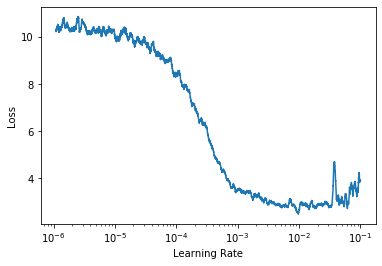

In [59]:
learner.plot_lrs(50)

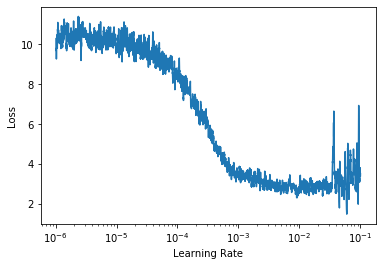

In [60]:
learner.plot_lrs(10)

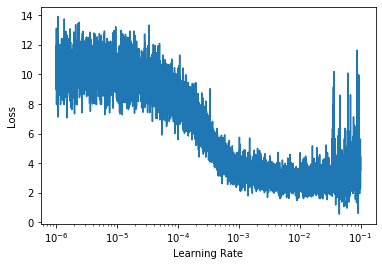

In [61]:
learner.plot_lrs(1)

In [62]:
cfobj.dropouts, cfobj.dropout_e

([0.25, 0.25, 0.1], 0.1)

In [100]:
del cfobj
torch.cuda.empty_cache()

In [101]:
pretrain_wts=pickle.load(open(f'{DATAPATH}/wts_embs_50','rb'))

In [93]:
cfobj=cf(n_users,n_emb_user,n_emb_item,n_items,min_rating,max_rating,denseCols,pretrain_wts,catCols,\
             emb_szs,dropout_e,hidden,dropouts,error_type="mse",lambda_l2=3e-1,lambda_l1=1e-3,use_l1=0,use_l2=0)
cfobj=cfobj.to(device)

In [94]:
if 1==0:
    cfobj.emb_user.weight.requires_grad=False
    cfobj.emb_item.weight.requires_grad=False
    cfobj.ib.weight.requires_grad=False
    cfobj.ub.weight.requires_grad=False

In [95]:
wd=1e-2

In [96]:
#wd=5e-2
optimizer=torch.optim.Adam(cfobj.parameters(),lr=8e-4,betas=(0.9,0.999)) #, weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=2,start_lr=8e-4,end_lr=2e-4,wd_mult=1.1)

In [97]:
learner.run_epochs(dltrain,dlvalid,1)

Epoch:0 Learning rate 0.0008 Weight Decay 0 Train Loss:3.0620638759651277                 Valid Loss:2.831300294381389 Train RMSE:1.7212024341718923 Valid RMSE:1.6697414031767897 Train MSE:3.0620638759651277 Valid MSE:2.831300294381389                 Train MAE:1.3734532080676083 Valid MAE:1.3078252548935532


In [98]:
optimizer=torch.optim.SGD(cfobj.parameters(),lr=7e-3,momentum=0.9, weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,16000,0.25,cycle_mult=0,start_lr=9e-3,end_lr=3e-3,wd_mult=1.2)

In [99]:
learner.run_epochs(dltrain,dlvalid,3)

Epoch:0 Learning rate 0.007 Weight Decay 0.01 Train Loss:2.802150795434384                 Valid Loss:3.969029474651617 Train RMSE:1.6590329746209274 Valid RMSE:1.9787185727108623 Train MSE:2.802150795434384 Valid MSE:3.969029474651617                 Train MAE:1.3087587664150762 Valid MAE:1.547137518604656
Epoch:1 Learning rate 0.007 Weight Decay 0.01 Train Loss:3.2425620923260814                 Valid Loss:4.085732616763423 Train RMSE:1.788696898548553 Valid RMSE:2.0073121303229504 Train MSE:3.2425620923260814 Valid MSE:4.085732616763423                 Train MAE:1.4413264678172315 Valid MAE:1.57331707720635


KeyboardInterrupt: 

In [154]:
learner.run_epochs(dltrain,dlvalid,11)

Epoch:0 Learning rate 0.000282842712474619 Weight Decay 0.013310000000000002 Train Loss:1.6295320517400282                 Valid Loss:3.1276305840648098 Train RMSE:1.2618826543649835 Valid RMSE:1.7562429992093906 Train MSE:1.6295320517400282 Valid MSE:3.1276305840648098                 Train MAE:0.9389639281699779 Valid MAE:1.3357004469659912
Epoch:1 Learning rate 0.0002 Weight Decay 0.014641000000000003 Train Loss:1.5434684929793088                 Valid Loss:3.1566229052450705 Train RMSE:1.2270831620369629 Valid RMSE:1.7642855707118659 Train MSE:1.5434684929793088 Valid MSE:3.1566229052450705                 Train MAE:0.9065922486655256 Valid MAE:1.3397555527301028
Epoch:2 Learning rate 0.0008 Weight Decay 0.01 Train Loss:1.6994155929833894                 Valid Loss:3.2674673268462584 Train RMSE:1.2893472690594625 Valid RMSE:1.7950493217934627 Train MSE:1.6994155929833894 Valid MSE:3.2674673268462584                 Train MAE:0.957781069690389 Valid MAE:1.3624972692136463
Epoch:3 Le

KeyboardInterrupt: 

In [131]:
learner.run_epochs(dltrain,dlvalid,4)

Epoch:0 Learning rate 0.002 Weight Decay 0.9 Train Loss:2.4116502768864607                 Valid Loss:2.9316531448307153 Train RMSE:1.5477078270705908 Valid RMSE:1.7033220756946275 Train MSE:2.4116502768864607 Valid MSE:2.9316531448307153                 Train MAE:1.2074236104024023 Valid MAE:1.359164984283333
Epoch:1 Learning rate 0.0011246826503806982 Weight Decay 1.035 Train Loss:2.4189603023365165                 Valid Loss:2.9002072343569316 Train RMSE:1.5501514060605825 Valid RMSE:1.6943958513317279 Train MSE:2.4189603023365165 Valid MSE:2.9002072343569316                 Train MAE:1.210161036048115 Valid MAE:1.338718356129652
Epoch:2 Learning rate 0.0006324555320336759 Weight Decay 1.1902499999999998 Train Loss:2.410910057963014                 Valid Loss:2.8728258438452987 Train RMSE:1.5476121467213626 Valid RMSE:1.6866118344476682 Train MSE:2.410910057963014 Valid MSE:2.8728258438452987                 Train MAE:1.208745735405705 Valid MAE:1.3261760426852518
Epoch:3 Learning r

In [138]:
learner.run_epochs(dltrain,dlvalid,7)

Epoch:0 Learning rate 0.00019999999999999998 Weight Decay 1.5741056249999994 Train Loss:2.347346466965059                 Valid Loss:2.8533737737975433 Train RMSE:1.5269872460861873 Valid RMSE:1.6810773538227843 Train MSE:2.347346466965059 Valid MSE:2.8533737737975433                 Train MAE:1.1891239414628711 Valid MAE:1.3137061867171418
Epoch:1 Learning rate 0.002 Weight Decay 0.9 Train Loss:2.420200078694208                 Valid Loss:2.928866374278497 Train RMSE:1.5505726274339888 Valid RMSE:1.702783318403242 Train MSE:2.420200078694208 Valid MSE:2.928866374278497                 Train MAE:1.2105223508981557 Valid MAE:1.3557842784299108
Epoch:2 Learning rate 0.0014997884186649117 Weight Decay 1.035 Train Loss:2.4379069017310386                 Valid Loss:2.9122196971299408 Train RMSE:1.5562398140990483 Valid RMSE:1.6976542358375515 Train MSE:2.4379069017310386 Valid MSE:2.9122196971299408                 Train MAE:1.2161797909221554 Valid MAE:1.3487602554395528
Epoch:3 Learning r

In [ ]:
learner.run_epochs(dltrain,dlvalid,7)

In [96]:
wd=1e-4
optimizer=torch.optim.Adam(cfobj.parameters(),lr=8e-4,betas=(0.9,0.999), weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=2,start_lr=8e-4,end_lr=3e-5,wd_mult=1.15)

In [97]:
learner.run_epochs(dltrain,dlvalid,7)

Epoch:0 Learning rate 0.0008 Weight Decay 0.0001 Train Loss:2.5856591852714113                 Valid Loss:2.979421829035182 Train RMSE:1.5990467256887815 Valid RMSE:1.7165082999695869 Train MSE:2.5856591852714113 Valid MSE:2.979421829035182                 Train MAE:1.2515016949508466 Valid MAE:1.351506347427825
Epoch:1 Learning rate 0.0001549193338482967 Weight Decay 0.00011499999999999999 Train Loss:2.313458416329273                 Valid Loss:2.980698911015859 Train RMSE:1.5157491695874148 Valid RMSE:1.7162649487320123 Train MSE:2.313458416329273 Valid MSE:2.980698911015859                 Train MAE:1.1756904505473698 Valid MAE:1.3491603625034858
Epoch:2 Learning rate 3.0000000000000004e-05 Weight Decay 0.00013225 Train Loss:2.2762790014817944                 Valid Loss:2.993560966617333 Train RMSE:1.5033727380685806 Valid RMSE:1.7195877227684224 Train MSE:2.2762790014817944 Valid MSE:2.993560966617333                 Train MAE:1.166597118022594 Valid MAE:1.355071458630933
Epoch:3 L

In [87]:
learner.generate_scores=True

In [88]:
learner.run_epoch(dlvalid,False)

(2.8548444915211, 1.3318111628428035, 1.678277068572291)

In [89]:
dfvalid['pred_dnnrec']=np.concatenate(learner.scores)

In [90]:
np.sqrt(metrics.mean_squared_error(dfvalid['rating'],dfvalid['pred_dnnrec']))

1.6892834258542144

In [91]:
def score_by_group (dfvalid,predVar,groupVar='cold_start_group',method='global_avg'):
    scores=[]
    mae_scores=[]
    rmse_scores=[]
    r2_scores=[]
    groups=dfvalid[groupVar].value_counts().index.tolist()
    for group in groups:
        df=dfvalid.loc[dfvalid[groupVar]==group]
        actual=df['rating']
        score=metrics.mean_squared_error(df['rating'],df[predVar])
        rmse_score=np.sqrt(metrics.mean_squared_error(df['rating'],df[predVar]))
        mae_score=metrics.mean_absolute_error(df['rating'],df[predVar])
        r2_score=metrics.r2_score(df['rating'],df[predVar])
        scores.append(score)
        mae_scores.append(mae_score)
        rmse_scores.append(rmse_score)
        r2_scores.append(r2_score)
    return pd.DataFrame({'method':method, 'mse':scores, 'rmse':rmse_scores, 'mae':mae_scores, 'r2_score':r2_scores, 'Cold Start Group':groups})

In [92]:
result_dnnrec=pd.concat([score_by_group(dfvalid,'pred_dnnrec','cold_start_group','dnnrec'),score_by_group(dfvalid,'pred_dnnrec','cold_start_bucket','dnnrec'),\
score_by_group(dfvalid,'pred_dnnrec','flag_train','dnnrec')],axis=0)
result_dnnrec

,method,mse,rmse,mae,r2_score,Cold Start Group
0,dnnrec,2.685176,1.638651,1.280587,0.190746,No-cold-start
1,dnnrec,2.751239,1.658686,1.316040,0.242140,Item-Cold_start
2,dnnrec,3.347204,1.829537,1.465718,0.021518,User-Cold-Start
3,dnnrec,3.954119,1.988497,1.626165,-0.006588,User-Item-cold-start
0,dnnrec,2.685176,1.638651,1.280587,0.190746,0
1,dnnrec,3.070593,1.752311,1.397206,0.149239,1
0,dnnrec,2.853678,1.689283,1.331572,0.173859,0


In [68]:
torch.save(cfobj,f=f'{DATAPATH}/inter/cfobj_tl_0.8')
torch.save(learner,f=f'{DATAPATH}/inter/cfobj_tl_learner_0.8')
torch.save(optimizer,f=f'{DATAPATH}/inter/cfobj_tl_optimizer_0.8')
torch.save(cfobj.state_dict(),f'{DATAPATH}/inter/cfjobj_tl_state_dict_0.8')
torch.save(optimizer.state_dict(),f'{DATAPATH}/inter/optimizer_tl_state_dict_0.8')

/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [69]:
results_concat.shape

(66, 6)

In [70]:
results_concat=pd.concat([results_concat,result_dnnrec],axis=0)

In [71]:
pickle.dump([df,dftrain,dfvalid,idx_to_user,idx_to_item,item_to_idx,user_to_idx,results_concat],open(f'{DATAPATH}/df_side_cold_runother_dnnrec.pkl','wb'))